<a href="https://colab.research.google.com/github/francji1/01NAEX/blob/main/code/01NAEX_Exercise_06_python_solution_by_Rendl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAEX Exercise 06
## author: xxx

## Problem 6.31 + 6.32

from the chapter 6, D. C. Montgomery DAoE - 8. edition.

An experiment was conducted on a chemical process that produces a
polymer. The four factors studied were temperature (A), catalyst
concentration (B), time (C), and pressure (D). Two responses, molecular
weight and viscosity, were observed. The design matrix and response data
are following:

In [1]:
!pip install pyDOE3

In [2]:
from pyDOE3 import ff2n
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from matplotlib import cm

df631 = pd.read_csv("https://raw.githubusercontent.com/francji1/01NAEX/main/data/Problem_6_31.txt", sep=";")
df631.head()

,Temperature,Concentration,Time,Pressure,Weight,Viscosity
0,100,4,20,60.0,2400,1400
1,120,4,20,60.0,2410,1500
2,100,8,20,60.0,2315,1520
3,120,8,20,60.0,2510,1630
4,100,4,30,60.0,2615,1380


Use only first sixteen measurements, center points will be covered in
the following lesson.

## Tasks:

1. Consider only the molecular weight response. Plot the effect
estimates on a normal probability scale. What effects appear
important?

2. Use an analysis of variance to confirm the results from the first
part.

3. Write down a regression model to predict molecular weight as a
  function of the important variables.
  
4. Analyze the residuals and comment on model adequacy.

5. Repeat parts 1.--4. using the viscosity response.

Use the regression models for molecular weight and viscosity to answer
the following questions.

6. Construct a response surface contour plot
for molecular weight. In what direction would you adjust therocess
variables to increase molecular weight?

7. Construct a response surface
contour plot for viscosity. In what direction would you adjust the
process variables to decrease viscosity?

8. What operating conditions
would you recommend if it was necessary to produce a product with
molecular weight between 2400 and 2500 and the lowest possible
viscosity?

In [3]:
m = ff2n(4)
m = m[:, ::-1]

m_df = pd.DataFrame(m, columns=["A", "B", "C", "D"])
Weight = df631.loc[0:15, "Weight"].values
Viscosity = df631.loc[0:15, "Viscosity"].values
m_df['Weight'] = Weight
m_df['Viscosity'] = Viscosity
response_names = m_df.columns[-2:].tolist()

print("Response names:", response_names)
print(m_df)


Response names: ['Weight', 'Viscosity']
      A    B    C    D  Weight  Viscosity
0  -1.0 -1.0 -1.0 -1.0    2400       1400
1   1.0 -1.0 -1.0 -1.0    2410       1500
2  -1.0  1.0 -1.0 -1.0    2315       1520
3   1.0  1.0 -1.0 -1.0    2510       1630
4  -1.0 -1.0  1.0 -1.0    2615       1380
5   1.0 -1.0  1.0 -1.0    2625       1525
6  -1.0  1.0  1.0 -1.0    2400       1500
7   1.0  1.0  1.0 -1.0    2750       1620
8  -1.0 -1.0 -1.0  1.0    2400       1400
9   1.0 -1.0 -1.0  1.0    2390       1525
10 -1.0  1.0 -1.0  1.0    2300       1500
11  1.0  1.0 -1.0  1.0    2520       1500
12 -1.0 -1.0  1.0  1.0    2625       1420
13  1.0 -1.0  1.0  1.0    2630       1490
14 -1.0  1.0  1.0  1.0    2500       1500
15  1.0  1.0  1.0  1.0    2710       1600


Task 1

           Effects
Intercept  5012.50
A           123.75
B           -11.25
A:B         120.00
C           201.25
A:C          20.00
B:C         -22.50
A:B:C        16.25
D             6.25
A:D         -17.50
B:D           7.50
A:B:D       -11.25
C:D          12.50
A:C:D       -18.75
B:C:D         3.75


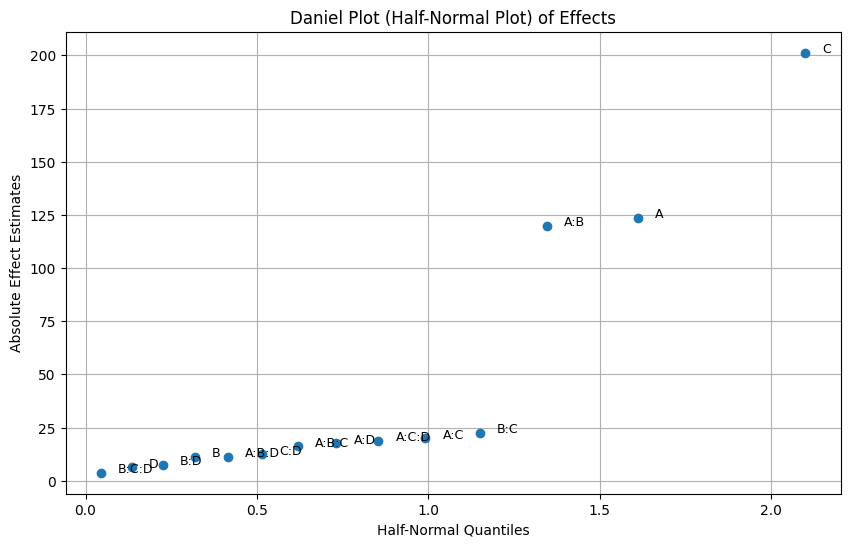

In [4]:
model = smf.ols('Weight ~ A * B * C * D - A:B:C:D', data=m_df).fit()

coeffs = model.params
effects = coeffs * 2
effects_df = pd.DataFrame(effects, columns=['Effects'])
print(effects_df)

effects_no_intercept = effects_df.drop('Intercept')
effects_abs = effects_no_intercept['Effects'].abs()
effects_sorted = effects_abs.sort_values()
effect_names_sorted = effects_sorted.index.tolist()

n = len(effects_sorted)
i = np.arange(1, n + 1)
probabilities = (i - 0.5) / n
expected_values = stats.halfnorm.ppf(probabilities)

plt.figure(figsize=(10, 6))
plt.plot(expected_values, effects_sorted, 'o')


for x, y, label in zip(expected_values, effects_sorted, effect_names_sorted):
    plt.text(x + 0.05, y, label, fontsize=9, ha='left')

plt.xlabel('Half-Normal Quantiles')
plt.ylabel('Absolute Effect Estimates')
plt.title('Daniel Plot (Half-Normal Plot) of Effects')
plt.grid(True)
plt.show()

A, C a A:B jsou důležité

Task 2

In [5]:
model_reduced = smf.ols('Weight ~ A + C + A:B', data=m_df).fit()
anova_results = sm.stats.anova_lm(model_reduced, typ=2)
print("ANOVA Results:")
print(anova_results)

ANOVA Results:
             sum_sq    df           F        PR(>F)
A          61256.25   1.0   64.409639  3.639030e-06
C         162006.25   1.0  170.346112  1.886428e-08
A:B        57600.00   1.0   60.565170  4.980951e-06
Residual   11412.50  12.0         NaN           NaN


Odpovídá zjištění z Daniel plotu

In [6]:
model = smf.ols('Weight ~ A + B + C + A:B', data=m_df).fit()

print(model.summary())
coeffs = model.params
print("Estimated Coefficients:")
print(coeffs)

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     70.95
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           8.80e-08
Time:                        08:59:24   Log-Likelihood:                -74.899
No. Observations:                  16   AIC:                             159.8
Df Residuals:                      11   BIC:                             163.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2506.2500      7.872    318.378      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


Model: Weight = 2506,25 + 61,875A + 100,625C + 60AB

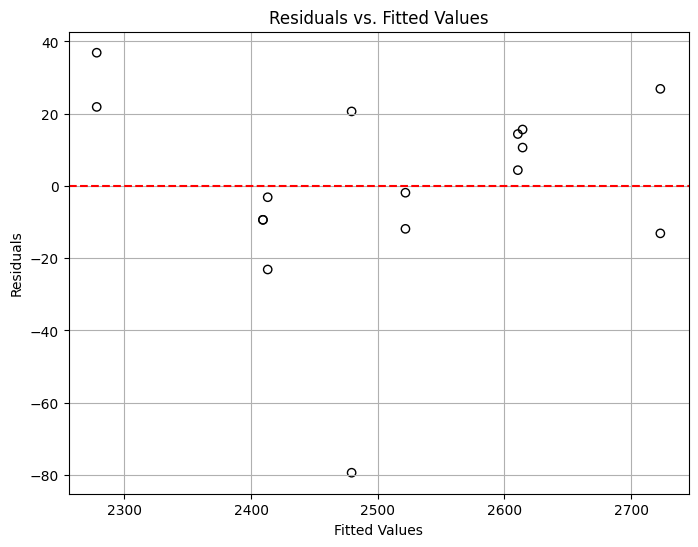

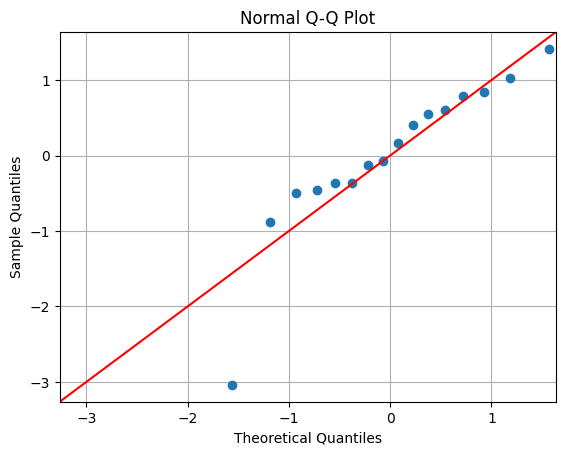

In [7]:
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(fitted, residuals, edgecolors='k', facecolors='none')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.grid(True)
plt.show()

Máme jeden outlier který by stál za bližší prozkoumání

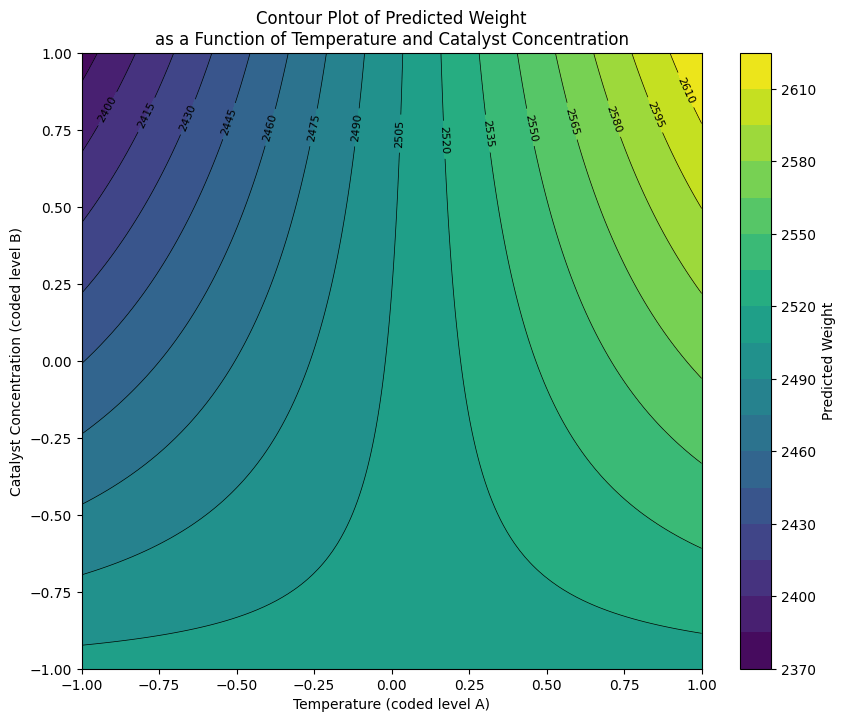

In [8]:
coeffs_weight = model.params

def predict_weight(A, B, C):
    return (coeffs_weight['Intercept']
            + coeffs_weight['A'] * A
            + coeffs_weight['B'] * B
            + coeffs_weight['C'] * C
            + coeffs_weight['A:B'] * A * B)

A_range = np.linspace(-1, 1, 100)
B_range = np.linspace(-1, 1, 100)
A_grid, B_grid = np.meshgrid(A_range, B_range)

C_fixed = 0
Weight_pred = predict_weight(A_grid, B_grid, C_fixed)
plt.figure(figsize=(10, 8))
contour = plt.contourf(A_grid, B_grid, Weight_pred, levels=20, cmap=cm.viridis)
plt.colorbar(contour, label='Predicted Weight')

plt.xlabel('Temperature (coded level A)')
plt.ylabel('Catalyst Concentration (coded level B)')
plt.title('Contour Plot of Predicted Weight\nas a Function of Temperature and Catalyst Concentration')

contour_lines = plt.contour(A_grid, B_grid, Weight_pred, levels=20, colors='k', linewidths=0.5)
plt.clabel(contour_lines, fmt='%d', inline=True, fontsize=8)

plt.show()

Task 5, zopakovat všechno pro vizkozitu

           Effects
Intercept  3001.25
A            96.25
B            91.25
A:B         -13.75
C             7.50
A:C          12.50
B:C          10.00
A:B:C        15.00
D           -17.50
A:D         -22.50
B:D         -25.00
A:B:D       -10.00
C:D          13.75
A:C:D        -1.25
B:C:D        18.75


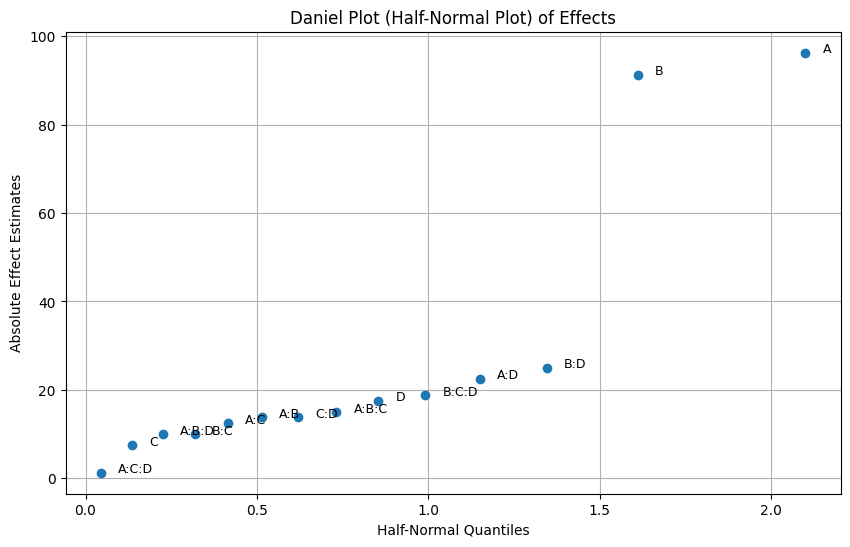

In [9]:
model = smf.ols('Viscosity ~ A * B * C * D - A:B:C:D', data=m_df).fit()

coeffs = model.params
effects = coeffs * 2

effects_df = pd.DataFrame(effects, columns=['Effects'])
print(effects_df)

effects_no_intercept = effects_df.drop('Intercept')
effects_abs = effects_no_intercept['Effects'].abs()
effects_sorted = effects_abs.sort_values()
effect_names_sorted = effects_sorted.index.tolist()
n = len(effects_sorted)
i = np.arange(1, n + 1)
probabilities = (i - 0.5) / n
expected_values = stats.halfnorm.ppf(probabilities)
plt.figure(figsize=(10, 6))
plt.plot(expected_values, effects_sorted, 'o')

for x, y, label in zip(expected_values, effects_sorted, effect_names_sorted):
    plt.text(x + 0.05, y, label, fontsize=9, ha='left')

plt.xlabel('Half-Normal Quantiles')
plt.ylabel('Absolute Effect Estimates')
plt.title('Daniel Plot (Half-Normal Plot) of Effects')
plt.grid(True)
plt.show()

A a B jsou významné

In [10]:
model_reduced = smf.ols('Viscosity ~ A + B', data=m_df).fit()
anova_results = sm.stats.anova_lm(model_reduced, typ=2)
print("ANOVA Results:")
print(anova_results)

ANOVA Results:
            sum_sq    df          F    PR(>F)
A         37056.25   1.0  35.733426  0.000046
B         33306.25   1.0  32.117293  0.000077
Residual  13481.25  13.0        NaN       NaN


Odpovídá předchozímu zjištění

In [11]:
model = smf.ols('Viscosity ~ A + B', data=m_df).fit()

print(model.summary())
coeffs = model.params
print("Estimated Coefficients:")
print(coeffs)

                            OLS Regression Results                            
Dep. Variable:              Viscosity   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     33.93
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           6.93e-06
Time:                        08:59:30   Log-Likelihood:                -76.595
No. Observations:                  16   AIC:                             159.2
Df Residuals:                      13   BIC:                             161.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1500.6250      8.051    186.397      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


Model: Viscosity = 1500,625 + 48,125A + 45,625B

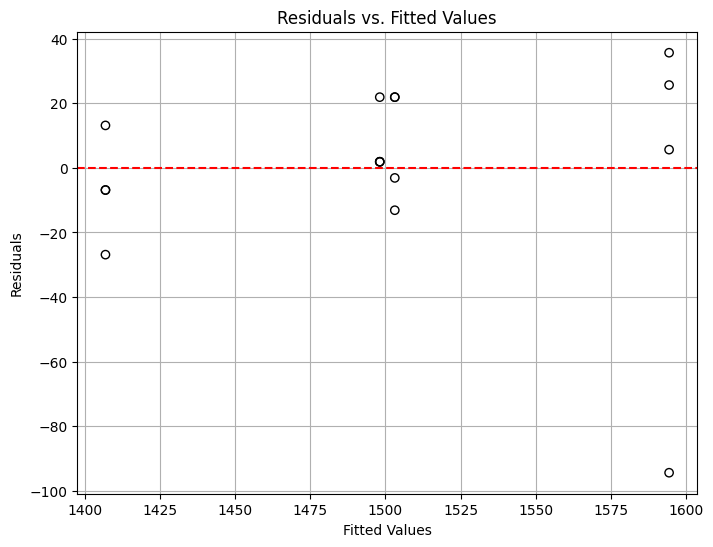

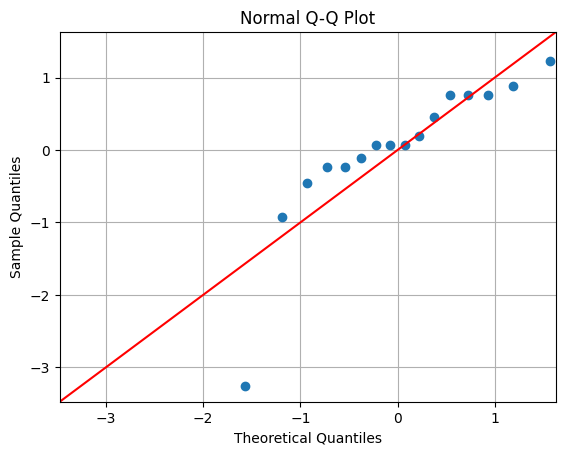

In [12]:
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(fitted, residuals, edgecolors='k', facecolors='none')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.grid(True)
plt.show()

Jeden outlier k vyšetření

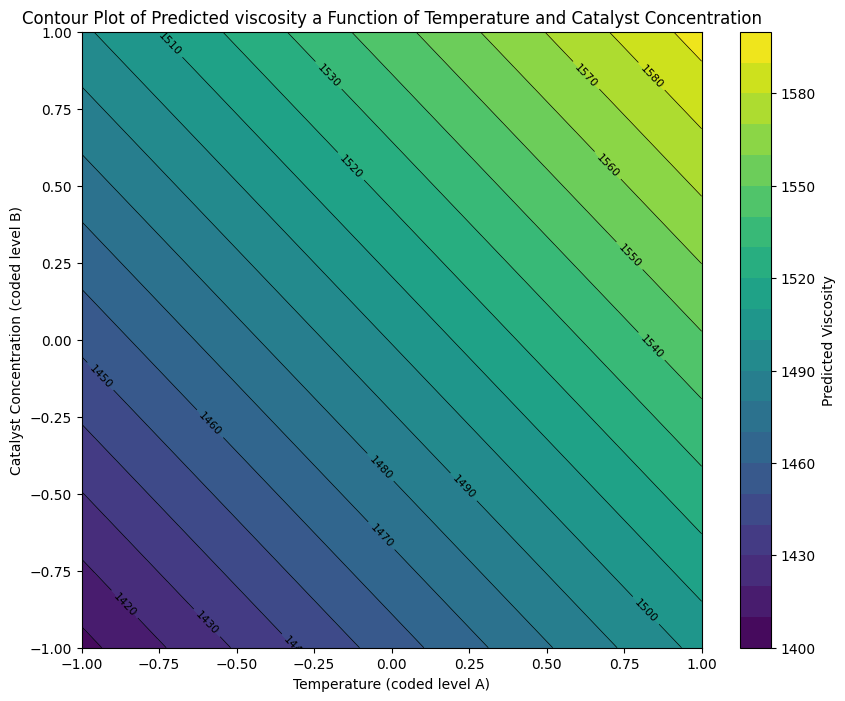

In [13]:
coeffs_vis = model.params
def predict_weight(A, B, C):
    return (coeffs_vis['Intercept']
            + coeffs_vis['A'] * A
            + coeffs_vis['B'] * B)

A_range = np.linspace(-1, 1, 100)
B_range = np.linspace(-1, 1, 100)
A_grid, B_grid = np.meshgrid(A_range, B_range)
C_fixed = 0
Weight_pred = predict_weight(A_grid, B_grid, C_fixed)
plt.figure(figsize=(10, 8))
contour = plt.contourf(A_grid, B_grid, Weight_pred, levels=20, cmap=cm.viridis)
plt.colorbar(contour, label='Predicted Viscosity')

plt.xlabel('Temperature (coded level A)')
plt.ylabel('Catalyst Concentration (coded level B)')
plt.title('Contour Plot of Predicted viscosity a Function of Temperature and Catalyst Concentration')

contour_lines = plt.contour(A_grid, B_grid, Weight_pred, levels=20, colors='k', linewidths=0.5)
plt.clabel(contour_lines, fmt='%d', inline=True, fontsize=8)

plt.show()

Weight Model Coefficients:
Intercept    2506.250
A              61.875
C             100.625
A:B            60.000
dtype: float64
Viscosity Model Coefficients:
Intercept    1500.625
A              48.125
B              45.625
dtype: float64


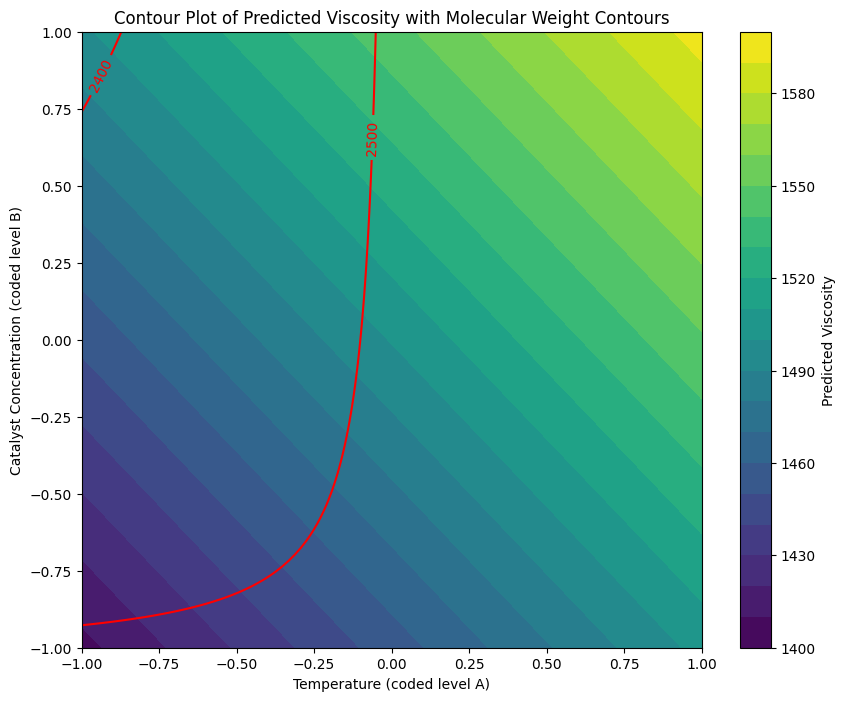

In [14]:
model_weight = smf.ols('Weight ~ A + C + A:B', data=m_df).fit()
coeffs_weight = model_weight.params
print("Weight Model Coefficients:")
print(coeffs_weight)

def predict_weight(A, B, C):
    return (coeffs_weight['Intercept']
            + coeffs_weight['A'] * A
            + coeffs_weight['C'] * C
            + coeffs_weight['A:B'] * A * B)

model_viscosity = smf.ols('Viscosity ~ A + B', data=m_df).fit()
coeffs_vis = model_viscosity.params
print("Viscosity Model Coefficients:")
print(coeffs_vis)

def predict_viscosity(A, B, C):
    return (coeffs_vis['Intercept']
            + coeffs_vis['A'] * A
            + coeffs_vis['B'] * B)

A_range = np.linspace(-1, 1, 100)
B_range = np.linspace(-1, 1, 100)
A_grid, B_grid = np.meshgrid(A_range, B_range)
C_fixed = 0

Viscosity_pred = predict_viscosity(A_grid, B_grid, C_fixed)
Weight_pred = predict_weight(A_grid, B_grid, C_fixed)

plt.figure(figsize=(10, 8))
contour_viscosity = plt.contourf(A_grid, B_grid, Viscosity_pred, levels=20, cmap=cm.viridis)
plt.colorbar(contour_viscosity, label='Predicted Viscosity')
weight_levels = [2400, 2500]
contour_weight = plt.contour(A_grid, B_grid, Weight_pred, levels=weight_levels, colors='red', linewidths=1.5)
plt.clabel(contour_weight, fmt='%d', inline=True, fontsize=10, colors='red')

plt.xlabel('Temperature (coded level A)')
plt.ylabel('Catalyst Concentration (coded level B)')
plt.title('Contour Plot of Predicted Viscosity with Molecular Weight Contours')

plt.show()

NameError: name 'df_optimal' is not defined

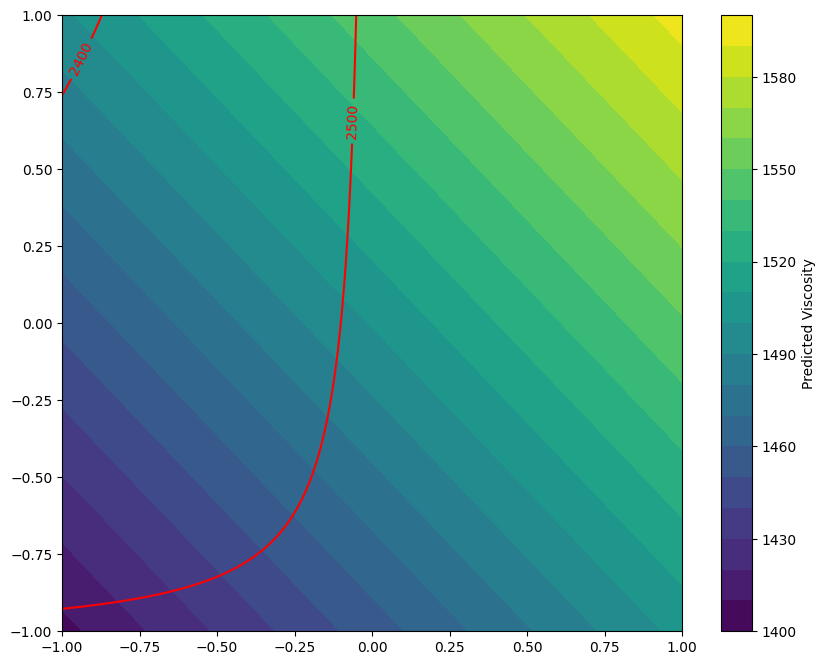

In [15]:
# Plot the contour with the optimal point
plt.figure(figsize=(10, 8))

# Plot viscosity as filled contours
contour_viscosity = plt.contourf(A_grid, B_grid, Viscosity_pred.reshape(A_grid.shape), levels=20, cmap=cm.viridis)
plt.colorbar(contour_viscosity, label='Predicted Viscosity')

# Overlay molecular weight contours between 2400 and 2500
weight_levels = [2400, 2500]
contour_weight = plt.contour(A_grid, B_grid, Weight_pred.reshape(A_grid.shape), levels=weight_levels, colors='red', linewidths=1.5)
plt.clabel(contour_weight, fmt='%d', inline=True, fontsize=10, colors='red')

# Plot the optimal point
plt.scatter(df_optimal['A'], df_optimal['B'], color='yellow', edgecolors='black', s=100, label='Optimal Point')
plt.legend()

# Add labels and title
plt.xlabel('Temperature (coded level A)')
plt.ylabel('Catalyst Concentration (coded level B)')
plt.title('Contour Plot with Optimal Operating Conditions')

plt.show()
